In [1]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
import warnings

warnings.filterwarnings("ignore")

### Load data

In [3]:
data = pd.read_csv(r"../data/loan.csv")
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128,360,1,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66,360,1,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120,360,1,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141,360,1,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267,360,1,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
475,LP002978,Female,No,0,Graduate,No,2900,0.0,71,360,1,Rural,Y
476,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40,180,1,Rural,Y
477,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253,360,1,Urban,Y
478,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187,360,1,Urban,Y


In [4]:
data['Dependents'].unique()

array(['1', '0', '2', '3+'], dtype=object)

In [5]:
data.drop(columns=['Loan_ID'], inplace=True)
data['Gender'] = data['Gender'].replace({'Male': 0, 'Female': 1})
data['Married'] = data['Married'].replace({'No': 0, 'Yes': 1})
data['Dependents'] = data['Dependents'].replace({'0': 0, '1': 1, '2': 2, '3+': 3})
data['Education'] = data['Education'].replace({'Not Graduate': 0, 'Graduate': 1})
data['Self_Employed'] = data['Self_Employed'].replace({'No': 0, 'Yes': 1})
data['Property_Area'] = data['Property_Area'].replace({'Rural': 0, 'Semiurban': 1, 'Urban': 2})
data['Loan_Status'] = data['Loan_Status'].replace({'N': 0, 'Y': 1})
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,1,1,0,4583,1508.0,128,360,1,0,0
1,0,1,0,1,1,3000,0.0,66,360,1,2,1
2,0,1,0,0,0,2583,2358.0,120,360,1,2,1
3,0,0,0,1,0,6000,0.0,141,360,1,2,1
4,0,1,2,1,1,5417,4196.0,267,360,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
475,1,0,0,1,0,2900,0.0,71,360,1,0,1
476,0,1,3,1,0,4106,0.0,40,180,1,0,1
477,0,1,1,1,0,8072,240.0,253,360,1,2,1
478,0,1,2,1,0,7583,0.0,187,360,1,2,1


In [6]:
data.shape

(480, 12)

In [7]:
X=data.iloc[:,0:11].values
y=data.iloc[:,-1].values

In [8]:
X_col_type = [0,0,0,0,0,1,1,1,1,0,0]

In [9]:
from StratKFold import StratKFold
sk = StratKFold(n_splits=10)
sk.add_data(X,y)
folds = sk.get_folds()

[([15, 457, 124, 55, 8, 448, 195, 320, 139, 172, 18, 52, 432, 196, 221, 76, 17, 189, 395, 409, 225, 224, 197, 253, 28, 374, 185, 194, 299, 336, 353, 120, 188, 112, 151, 331, 32, 167, 394, 91, 360, 262, 433, 252, 175, 208, 66, 429, 411, 290, 379, 283, 310, 190, 148, 271, 423, 23, 62, 462, 145, 101, 30, 170, 158, 93, 173, 461, 387, 184, 256, 210, 463, 72, 75, 229, 265, 87, 392, 216, 69, 31, 242, 270, 135, 328, 383, 191, 452, 322, 223, 171, 144, 297, 475, 473, 376, 293, 134, 404, 382, 314, 273, 364, 105, 152, 14, 95, 128, 24, 264, 456, 234, 85, 126, 260, 193, 348, 240, 45, 97, 88, 245, 340, 220, 329, 413, 56, 20, 166, 59, 33, 436, 425, 43, 3, 424, 366, 153, 451, 363, 477, 58, 21, 9, 238, 149, 165, 380, 142, 11, 284, 466, 351, 445, 323, 199, 286, 352, 428, 233, 146, 227, 469, 407, 78, 27, 38, 19, 471, 292, 42, 317, 209, 356, 467, 302, 446, 468, 278, 308, 4, 143, 258, 222, 131, 29, 241, 315, 206, 94, 96, 228, 0, 443, 100, 44, 226, 164, 276, 41, 154, 104, 205, 277, 60, 117, 306, 347, 232, 27

### Random Forest

In [10]:
from RandomForestClassifier import RandomForestClassifier 
# rfc = RandomForestClassifier(5)

In [11]:
from multiple_utils import compute_confusion_matrix, calculate_accuracy, calculate_precision, calculate_recall, calculate_f1score
accuracies = []
f1_scores = []
n_tree_values = [1,5,10,20,30,40,50]
for ntrees in n_tree_values:
    rfc = RandomForestClassifier(criterion="gini_impurity",ntree=ntrees)
    mean_accuracy = 0
    mean_f1_score = 0

    for fold in folds:
        train_indices = fold[0]
        test_indices = fold[1]
        X_train = X[train_indices]
        y_train = y[train_indices]
        X_test = X[test_indices]
        y_test = y[test_indices]
        rfc.fit(X_train, y_train, X_col_type)
        y_pred = rfc.predict(X_test)
        confusion_mat, n = compute_confusion_matrix(y_test, y_pred,[0,1])
        mean_accuracy += calculate_accuracy(confusion_mat, n) 
        mean_f1_score += calculate_f1score(calculate_precision(confusion_mat), calculate_recall(confusion_mat))


    mean_accuracy /= len(folds)
    mean_f1_score /= len(folds)
    print("accuracy: ", mean_accuracy)
    print("f1 score: ", mean_f1_score)
    accuracies.append(mean_accuracy)
    f1_scores.append(mean_f1_score)


accuracy:  0.6788500506585613
f1 score:  0.597504132037356
accuracy:  0.6980840208423795
f1 score:  0.5335326258875327
accuracy:  0.7245205529020119
f1 score:  0.62945225700738
accuracy:  0.7103234910985672
f1 score:  0.6058118095405477
accuracy:  0.7084120350267766
f1 score:  0.5346476625255617
accuracy:  0.7081533145172962
f1 score:  0.5405049290914844
accuracy:  0.70424536836011
f1 score:  0.5428710063746494


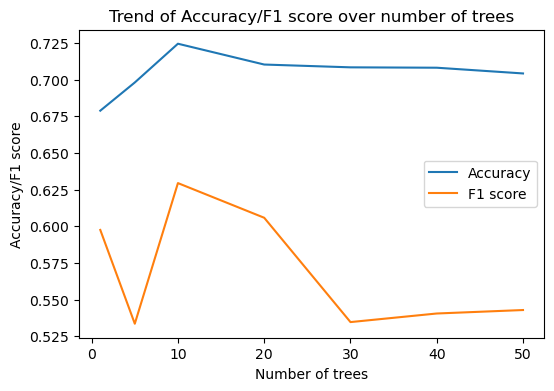

In [12]:
plt.figure(figsize=(6, 4))
plt.plot(n_tree_values, accuracies, label="Accuracy")
plt.plot(n_tree_values, f1_scores, label="F1 score")
plt.xlabel('Number of trees')
plt.ylabel('Accuracy/F1 score')
plt.title('Trend of Accuracy/F1 score over number of trees')
plt.legend()
plt.show()

In [13]:
max_index = accuracies.index(max(accuracies))
print("Optimal accuracy reached at number of trees: ", n_tree_values[max_index])
max_index = f1_scores.index(max(f1_scores))
print("Optimal F1 score reached at number of trees: ", n_tree_values[max_index])

Optimal accuracy reached at number of trees:  10
Optimal F1 score reached at number of trees:  10


In [14]:
from multiple_utils import compute_confusion_matrix, calculate_accuracy, calculate_precision, calculate_recall, calculate_f1score
accuracies = []
f1_scores = []
max_depths = [10,20,30,40,50]
for max_depth in max_depths:
    rfc = RandomForestClassifier(criterion="gini_impurity",ntree=30, maximal_depth=max_depth)
    mean_accuracy = 0
    mean_f1_score = 0

    for fold in folds:
        train_indices = fold[0]
        test_indices = fold[1]
        X_train = X[train_indices]
        y_train = y[train_indices]
        X_test = X[test_indices]
        y_test = y[test_indices]
        rfc.fit(X_train, y_train, X_col_type)
        y_pred = rfc.predict(X_test)
        confusion_mat, n = compute_confusion_matrix(y_test, y_pred,[0,1])
        mean_accuracy += calculate_accuracy(confusion_mat, n) 
        mean_f1_score += calculate_f1score(calculate_precision(confusion_mat), calculate_recall(confusion_mat))


    mean_accuracy /= len(folds)
    mean_f1_score /= len(folds)
    print("accuracy: ", mean_accuracy)
    print("f1 score: ", mean_f1_score)
    accuracies.append(mean_accuracy)
    f1_scores.append(mean_f1_score)


accuracy:  0.7041585251121726
f1 score:  0.5313541446042214
accuracy:  0.7125398031553046
f1 score:  0.6108413659325655
accuracy:  0.7166585251121724
f1 score:  0.5981477379552461
accuracy:  0.7145770010131712
f1 score:  0.581441306802092
accuracy:  0.7124954769141698
f1 score:  0.5802523040219557


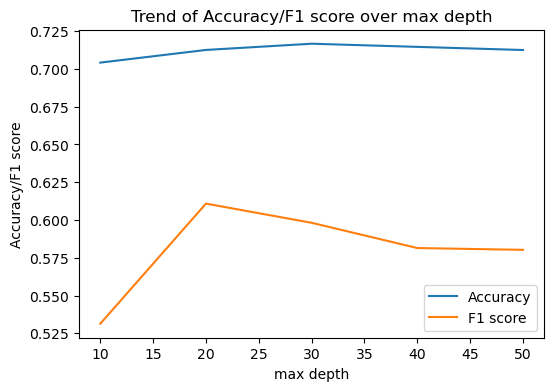

In [15]:
plt.figure(figsize=(6, 4))
plt.plot(max_depths, accuracies, label="Accuracy")
plt.plot(max_depths, f1_scores, label="F1 score")
plt.xlabel('max depth')
plt.ylabel('Accuracy/F1 score')
plt.title('Trend of Accuracy/F1 score over max depth')
plt.legend()
plt.show()

### KNN

In [16]:
from KNNClassifier import KNN_Classifier

In [17]:
from multiple_utils import compute_confusion_matrix, calculate_accuracy, calculate_precision, calculate_recall, calculate_f1score
from utils import Normalizer
scaler = Normalizer()

accuracies = []
f1_scores = []
n_neighbors = [1,5,10,20,30,40,50]
for n_neighbor in n_neighbors:
    knn = KNN_Classifier(n_neighbors=n_neighbor) 
    mean_accuracy = 0
    mean_f1_score = 0

    for fold in folds:
        train_indices = fold[0]
        test_indices = fold[1]
        X_train = X[train_indices]
        y_train = y[train_indices]
        X_train = scaler.fit_transform(X_train)
        X_test = X[test_indices]
        y_test = y[test_indices]
        X_test = scaler.transform(X_test)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        confusion_mat, n = compute_confusion_matrix(y_test, y_pred,[0,1])
        mean_accuracy += calculate_accuracy(confusion_mat, n) 
        mean_f1_score += calculate_f1score(calculate_precision(confusion_mat), calculate_recall(confusion_mat))


    mean_accuracy /= len(folds)
    mean_f1_score /= len(folds)
    print("accuracy: ", mean_accuracy)
    print("f1 score: ", mean_f1_score)
    accuracies.append(mean_accuracy)
    f1_scores.append(mean_f1_score)


accuracy:  0.6791567158778404
f1 score:  0.6231198026926161
accuracy:  0.7812138153133594
f1 score:  0.7258194687095482
accuracy:  0.7977529309596179
f1 score:  0.7516897962583032
accuracy:  0.7895471486466927
f1 score:  0.7457596214010238
accuracy:  0.7935844550586192
f1 score:  0.7488143884969747
accuracy:  0.7686233535967579
f1 score:  0.7177794293663309
accuracy:  0.7459192719641049
f1 score:  0.6878373837979781


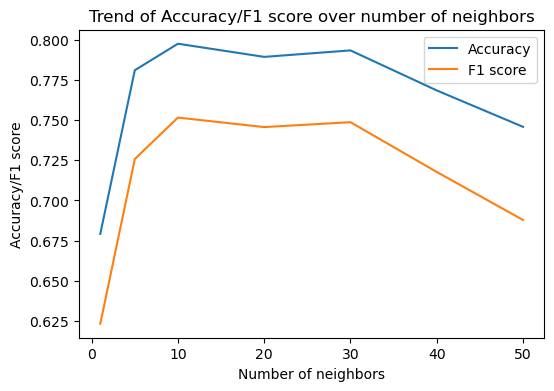

In [18]:
plt.figure(figsize=(6, 4))
plt.plot(n_neighbors, accuracies, label="Accuracy")
plt.plot(n_neighbors, f1_scores, label="F1 score")
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy/F1 score')
plt.title('Trend of Accuracy/F1 score over number of neighbors')
plt.legend()
plt.show()

In [19]:
max_index = accuracies.index(max(accuracies))
print("Optimal accuracy reached at number of neighbors: ", n_neighbors[max_index])
max_index = f1_scores.index(max(f1_scores))
print("Optimal F1 score reached at number of neighbors: ", n_neighbors[max_index])

Optimal accuracy reached at number of neighbors:  10
Optimal F1 score reached at number of neighbors:  10
